# COGS 118A - Final Project

# Insert title here

## Group members

- Kyle Moore | kcm004@ucsd.edu 
- Sebastian Balica | sbalica@ucsd.edu 
- Javon Maxie | jmaxie@ucsd.edu 
- Sam Woo | sdwoo@ucsd.edu 

# Abstract 

We will use regular season statistics of NBA players from [basketball reference](https://www.basketball-reference.com/) to predict voting results for All NBA awards. All NBA awards are highly prestigious and directly impact how much money a player can earn, as well as the betting market surrounding awards. The data will be cleaned using minute and year restrictions, and labeling whether or not a player was All NBA. Modeling will be performed with various classification methods from python’s sklearn: k nearest neighbors, support vector machines, and random forest; to determine the best prediction accuracy as well as the most impactful statistics(feature selection) a player can have. We will determine success through the classification reports including the F-Scores of each classification model due it being one of the better assessors when using imbalanced data, such as 15 All NBA players vs ~500 total players per year.

# Background

The All-NBA Team is an honor given to 15 players at the end of the each season. Media members vote on the league's best players and defenders, with two guards, two forwards, and one center picked for each team. This recognition, and voting process has been happening since 1956, with experts and sports enthusiasts making predictions on which players will make the All-NBA Team based on their statistics in the previous season. Sports predictions will take into consideration the average points, rebounds, assists, steals, and blocks per game for every player, in determining who has the highest chance of being awarded. Despite these strong predictions, how the selections are made has been a matter of controversy. Currently players are chosen according to positions, however this becomes a problem when players are considered multi-positional<a name="golliver"></a>[<sup>[1]</sup>](#gollivernote) or, for example, the two best players in the league are centers. One of these players will be bumped down to the second team despite being a top five player in the NBA. Using machine learning and player data, it can be decided which players really deserve to be on the All-NBA Team regardless of position. 

There have been lots of models, both personal and professional, that have been created to help predict anything that can happen in sports. While some of this is fan and "stathead" related, it also coincides with sports betting doubling in 2021<a name="marquardt"></a>[<sup>[2]</sup>](#marquardtnote) and the desire to gain an edge. Being able to predict sports through statistics can also be lucrative for finding talent, such as the famous "moneyball" scenario of the Oakland A's. Data analytics have also completely changed the way that games are played, coached, and practiced<a name="cohen"></a>[<sup>[3]</sup>](#cohennote). There have been previous attempts at using both classification and linear regression to predict NBA awards such as most valuable player(MVP), offensive and defensive players of the year(OPOY,DPOY), rookie of the year(ROY), and even whether or not someone will be inducted into the Hall of Fame.

One article details the use of regression to predict the MVP by considering "MVP share" as a numerical target<a name="yoo"></a>[<sup>[4]</sup>](#yoonote). They used the same dataset that we used in addition to their MVP voting data, and also linked to a [web scraper](https://github.com/jaebradley/basketball_reference_web_scraper). Yoo was able to acheive an accuracy of ~.83 using an XGBoost Regressor. We won't be able to use regression due to our problem being a classification problem, whether someone is on the All NBA team or not. 

Albert et al.<a name="albert"></a>[<sup>[5]</sup>](#albertnote) used Adaboost, random forest, and multilayer perceptron classifications to predict All Star results as opposed to All NBA. They were able to achieve an accuracy ~.9. They did do a preliminary, 40-fold cross-validation sensitivity test that included other models: SVC, k-nearest neighbor, decision tree, gaussian process; but it was determined that RF, Adaboost, and MLP were the best to move forward with. We will be using one model that they chose, RF, and two models they did not, SVC and KNN. 

Since we are planning on predicting only whether or not a player makes All NBA as ooposed to whether they make 1st, 2nd, or 3rd team, we are hoping to achieve similar results to the projects above. A logical future step would be to predict position voted for and which team they made. We feel that All NBA is less studied yet very important due to its impact on player salaries, such as Celtic's Jayson Tatum losing out on $32.6 million due to missing All NBA<a name="darren"></a>[<sup>[6]</sup>](#darrennote), as well as their overall legacy. Being able to predict these results could also help determine future salary cap considerations, trade values, betting before the lines change, and knowledge of which skills are most important for consideration.

# Problem Statement

Predicting whether a player will make or not make an All NBA team using their regular season statistics. Regular season statistics include points, assists, ft%, etc. and are very quantifiable due to the nature of sport statistics. The All NBA results will be the class labels (0/1). There are many machine learning classification options that can be applied and tuned to this problem (we will use KNN/SVM/RF). We can test the accuracy on test seasons after creating the models on training seasons. Due to the annual nature of the NBA, this problem is repeatable and the model will be applicable to future seasons. 

# Data


- Link to data
    - [Web Scraping and Data Cleaning Notebook](web_scraper_and_cleaning.ipynb)
    - Obtained from https://www.basketball-reference.com/
- Size of the data
    - After cleaning and merging the shape is (11586, 30), 30 variables with 11,586 observations
- Each observation contains:
    - A Player's stats for a single season
    - With variables:
        - 'Pos'
            - Position
        - 'Age'
            - Age
        - 'Tm'
            - Team
        - 'G'
            - Games played
        - 'GS'
            - Games started
        - 'MP'
            - Minutes played per game
        - 'FG'
            - Field goals made per game
        - 'FGA'
            - Fiedl goals attempted per game
        - 'FG%'
            - Field goal percentage
        - '3P'
            - 3 pointers made per game
        - '3PA'
            - 3 pointers attempted per game
        - '3P%'
            - 3 point percentage
        - '2P'
            - 2 pointers made per game
        - '2PA'
            - 2 pointers attempted per game
        - '2P%'
            - 2 point percentage
        - 'eFG%'
            - (2pt FGM + 1.5*3pt FGM) / FGA
            - Effective field goal percentage, includes value of a 3 vs a 2 pointer
        - 'FT'
            - Free throws made per game
        - 'FTA'
            - Free throws attempted per game
        - 'FT%'
            - Free throw percentage
        - 'ORB'
            - Offensive rebound per game
        - 'DRB'
            - Defensive rebound per game
        - 'TRB'
            - Total rebounds per game
        - 'AST'
            - Assists per game
        - 'STL'
            - Steals per game
        - 'BLK'
            - Blocks per game
        - 'TOV'
            - Turnovers per game
        - 'PF'
            - Personal fouls per game
        - 'PTS'
            - Points per game
        - 'Year'
            - Year the season ended in
        - 'all_nba_team'
            - All NBA team results
- Critical variables
    - Because All NBA takes into account a players entire seasons performance, all of these statistics are important for determining voting results. 
- Handling, transformations, cleaning, etc:
    - Gathering, cleaning, and transformations also in notebook linked above.
    - General steps taken:
        - Use BeautifulSoup to scrape yearly stats from basketball-reference.com and download their All NBA results csv
        - Clean both player stats and All NBA results dataframes
        - Merge dataframes together for use in modeling

In [2]:
# import all necessary packages and formulas

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Run our notebook to generate the dataframe

%run web_scraper_and_cleaning.ipynb

In [22]:
# Assign dataframe to the merged dataframe created in the web scraping notebook

df = merged_df

In [23]:
print('The shape of the dataframe is:', df.shape)
print('The columns of the dataframe are: \n', [x for x in df.columns])

The shape of the dataframe is: (11586, 32)
The columns of the dataframe are: 
 ['Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year', 'all_nba_team', 'all_nba', 'PTS/G']


In [24]:
# create column of class labels, 1 for All NBA, 0 for not

df['all_nba'] = np.where(df['all_nba_team'] >= 1, 1, 0)

# Proposed Solution

Our soultion to our problem statement is to train a model on a set of various basketball statistics from players that have made All NBA in the past. We will use stats from players from 1989-1900 season all the way to the 2020-2021 season. The reason we will not used stats from before 1989 is because there were only 2 All NBA teams selected. After 1989 the league started selecting three All NBA teams. Using libraries such as pandas, numpy, and scikit learn, we would like to test various models on our set of basketball statistics in order to get a preditiction of whether or not a player should make All NBA team or not. Some of the models we are planning to test our soltuion on are logistic regression, random forest, KNN, and SVM to start. Using model selection we will be able to see how the different models we use on our data stack up against one another. From there we will be able to determine which model performs the best.  The solution to our model will be reproducible because as more and more NBA season happen we will be able to not only makes predictions on who should make All NBA, but also add the stats for the players that do make All NBA teams in the future to make our model stronger. 

# Evaluation Metrics

One way we will evaluate the success of our models will be through the use of an accuracy score from the sklearn library. This will allows us to gauge how well our models are peforming when it comes to the predicting whether or not a player meets the criteria to be selected to an All NBA team. Another way we will evaluate the success of our models is by looking at there precision and recall scores. Using those scores we can also go ahead and calculate the F1-scores for each model to really solidify our idea of which model performs the best. F score is a great metric for imbalanced classes such as ours. In order to look at our models on the variable scale and see how each player statistic effects the overall model, we will be using sklearn's classification report. Theses reports will allow us to see the precision and recall scores for each variable in the training set of our models. From here we may be able to derive new models and drop certain player statistics from our training set that are holding our models back with low scores to see if we can improve the overall accuracy of our models.  

# Results

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Subsection 1

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

### Subsection 2

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

### Subsection 3

Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

### Subsection 5 

Maybe you do model selection again, but using a different kind of metric than before?



In [25]:
# add a points per game column
df['PTS/G'] = (df.PTS / df.G).round(decimals=1)

In [8]:
# gather numeric columns

numeric_columns = ['Age', 'G', 'GS', 'MP', 'FG', '3P', 'eFG%', 'FT', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'all_nba']

<AxesSubplot:>

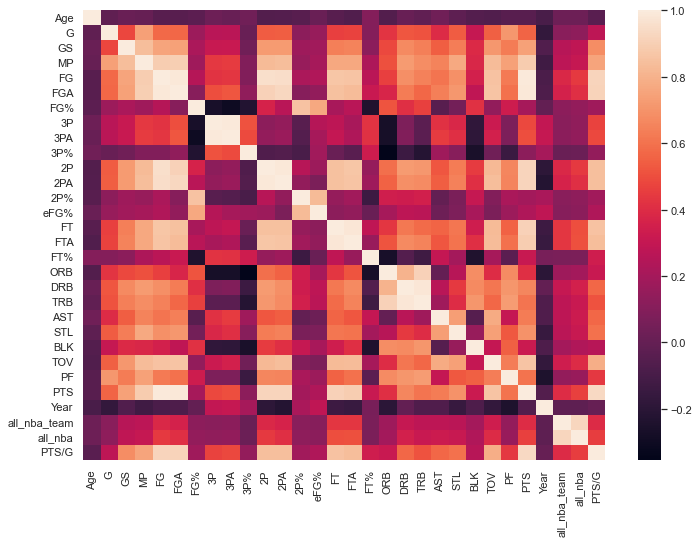

In [26]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr())

#### Feature Subset Using Domain Knowledge

We can see that there is redundant data and some unnecessary substats. We can remove some of this redundancy as well as look into regularization in our models to prevent complexity.

- Total rebounds(TRB) can be kept allowing us to remove the offensive and defensive subcategories
    - There is a defensive All NBA team where DRB might be more important but is not as relevant for our use case.
- Effective field goal percentage (eFG%) is a better measure and a combination of 2P% and 3P% based on their values
- Attempts aren't needed because that will be encompassed in shots made for FG and 3P in combination with eFG%
- Free throws made (FT) is also able to cover the volume of the FT categories according to the correlation plot
- The way the game is played has changed considerably over the years so subestting the years into eras might be necessary to better predict current voting and playing trends

In [27]:
df = df.drop(['FGA', 'FG%', '3PA', '3P%', '2P', '2PA', '2P%', 'FT%', 'FTA', 'ORB', 'DRB'], axis=1)

In [29]:
df

,Pos,Age,Tm,G,GS,MP,FG,3P,eFG%,FT,...,AST,STL,BLK,TOV,PF,PTS,Year,all_nba_team,all_nba,PTS/G
Player,,,,,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,C,41,LAL,74,74,1695,313,0,0.475,122,...,74,38,85,95,196,748,1989,0.0,0,10.1
Mark Acres,C,26,BOS,62,0,632,55,1,0.487,26,...,19,19,6,23,94,137,1989,0.0,0,2.2
Michael Adams,PG,26,DEN,77,77,2787,468,166,0.509,322,...,490,166,11,180,149,1424,1989,0.0,0,18.5
Mark Aguirre,SF,29,TOT,80,76,2597,586,51,0.481,288,...,278,45,36,208,229,1511,1989,0.0,0,18.9
Danny Ainge,PG,29,TOT,73,54,2377,480,116,0.512,205,...,402,93,8,145,186,1281,1989,0.0,0,17.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Delon Wright,SG,29,ATL,77,8,1452,122,44,0.535,54,...,188,93,19,45,56,342,2022,0.0,0,4.4
Thaddeus Young,PF,33,TOT,52,1,845,141,17,0.550,23,...,104,54,18,52,81,322,2022,0.0,0,6.2
Trae Young,PG,23,ATL,76,76,2652,711,233,0.536,500,...,737,72,7,303,128,2155,2022,0.0,0,28.4


<AxesSubplot:>

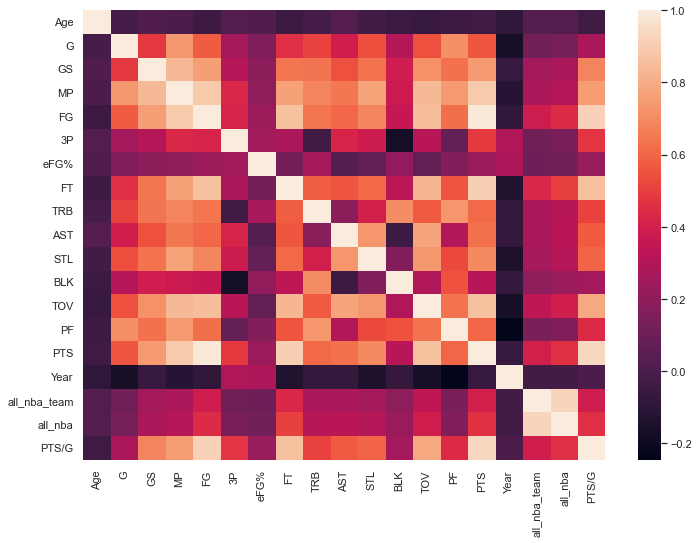

In [30]:
sns.heatmap(df.corr())

At a quick glance it appears that FG, FT, TOV, PTS, and PTS/G have the highest correlation with all_nba. Turnovers is interesting because it is a negative statistic and is possibly due to top players having high usage and therefor more likely to be involved in turnovers.

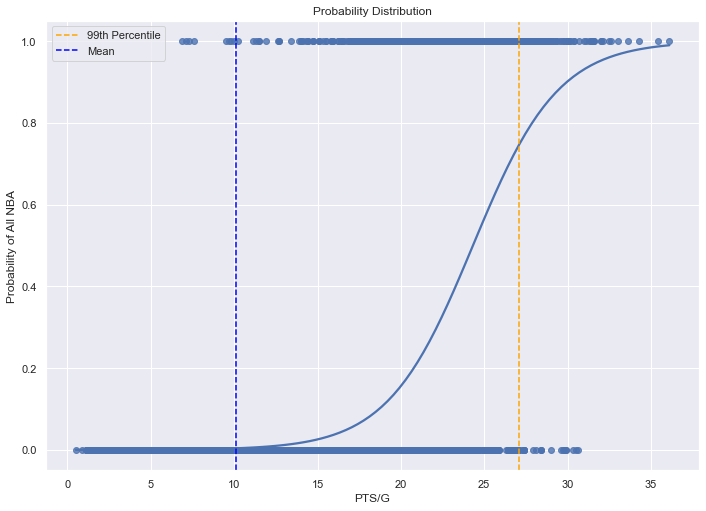

In [31]:
sns.regplot('PTS/G', 'all_nba', data=df, logistic=True, ci=None).set(title='Probability Distribution',
                                                                    ylabel = 'Probability of All NBA')
plt.axvline(df['PTS/G'].quantile(.99), color='orange', ls='--', label = '99th Percentile')
plt.axvline(df['PTS/G'].mean(), color='blue', ls='--', label = 'Mean')
plt.legend()

## Model Selection

In [36]:
# Split dataset

X_train, X_test, y_train, y_test = train_test_split(
    df[numeric_columns].drop(columns='all_nba')[df.Year != 2022], df.all_nba[df.Year !=2022], test_size=.33, random_state=42, stratify=df.all_nba[df.Year !=2022])

In [37]:
print('The shape of the X_train is:', X_train.shape)
print('The shape of the X_test is:', X_test.shape)
print('The shape of the y_train is:', y_train.shape)
print('The shape of the y_test is:', y_test.shape)

The shape of the X_train is: (7495, 15)
The shape of the X_test is: (3693, 15)
The shape of the y_train is: (7495,)
The shape of the y_test is: (3693,)


In [129]:
knn = KNeighborsClassifier()
k_range = list(range(1, 31,2))

param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='roc_auc', return_train_score=False,verbose=1)
grid_search = grid.fit(X_train, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


In [130]:
print(grid_search.best_params_)

{'n_neighbors': 29}


In [131]:
print(grid_search.best_score_)


0.9732436818616522


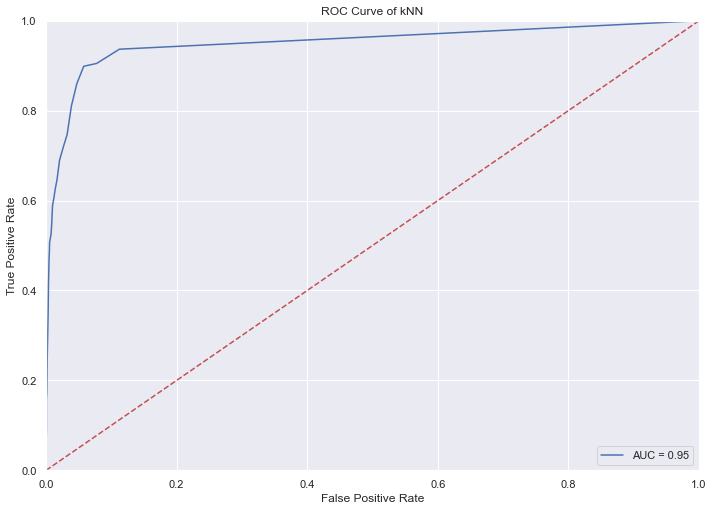

In [132]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
knn = KNeighborsClassifier(n_neighbors = 29)
knn.fit(X_train,y_train)

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

In [126]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
print('Precision:', precision_score(grid_search.predict(X_test), y_test))
print('Recall:', recall_score(grid_search.predict(X_test), y_test))
print('Roc_Auc_score:', roc_auc_score(grid_search.predict(X_test), y_test))



Precision: 0.5063291139240507
Recall: 0.8080808080808081
Roc_Auc_score: 0.8931889850086845


In [162]:
results = df[numeric_columns][df.Year == 2022]
results

,Age,G,GS,MP,FG,3P,eFG%,FT,TRB,AST,STL,BLK,TOV,PF,PTS,all_nba
Player,,,,,,,,,,,,,,,,
Precious Achiuwa,22,73,28,1725,265,56,0.486,78,473,82,37,41,84,151,664,0
Steven Adams,28,76,75,1999,210,0,0.547,108,760,256,65,60,115,153,528,0
Bam Adebayo,24,56,56,1825,406,0,0.557,256,564,190,80,44,148,171,1068,0
LaMarcus Aldridge,36,47,12,1050,252,14,0.566,89,258,42,14,47,44,78,607,0
Nickeil Alexander-Walker,23,65,21,1466,253,105,0.449,81,187,156,46,23,93,103,692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Delon Wright,29,77,8,1452,122,44,0.535,54,220,188,93,19,45,56,342,0
Thaddeus Young,33,52,1,845,141,17,0.550,23,208,104,54,18,52,81,322,0
Trae Young,23,76,76,2652,711,233,0.536,500,284,737,72,7,303,128,2155,0


In [163]:
rf = results.assign(predict = knn.predict( df[numeric_columns].drop(columns='all_nba')[df.Year == 2022]))


In [164]:
rf[rf['predict']== 1]

,Age,G,GS,MP,FG,3P,eFG%,FT,TRB,AST,STL,BLK,TOV,PF,PTS,all_nba,predict
Player,,,,,,,,,,,,,,,,,
Giannis Antetokounmpo,27,67,67,2204,689,71,0.582,553,778,388,72,91,219,212,2002,0,1
Devin Booker,25,68,68,2345,662,183,0.530,315,342,329,77,26,162,180,1822,0,1
DeMar DeRozan,32,76,76,2743,774,50,0.521,520,392,374,68,24,181,178,2118,0,1
Luka Dončić,22,65,65,2301,641,201,0.529,364,593,568,75,36,292,145,1847,0,1
Kevin Durant,33,55,55,2047,578,115,0.570,372,407,351,48,52,191,113,1643,0,1
Joel Embiid,27,68,68,2297,666,93,0.534,654,796,284,77,99,214,181,2079,0,1
LeBron James,37,56,56,2084,640,161,0.590,254,459,349,73,59,196,121,1695,0,1
Nikola Jokić,26,74,74,2476,764,97,0.620,379,1019,584,109,63,281,191,2004,0,1
Jayson Tatum,23,76,76,2731,708,230,0.526,400,609,334,75,49,217,174,2046,0,1


# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

### Ethics & Privacy

Potential ethical implications of using a model to predict All NBA players include indirectly altering the game and playstyles, by indicating that a certain playstyle is more likely to be rewarded with All NBA votes over other playstyles. Consequently, all players may try to model their games after this select playstyle, which could result in the NBA becoming less entertaining and more rigid and monotonous. 

Anything sports related must consider gambling and its effects on people as well. Betting on All NBA teams exists but is a season long bet, and our model won't have the reach or power to have an impact on bets or opinions but it is important to acknowledge for any future work. The data itself is free use from basketball reference and they only charge for custom sets. More about their data use rules can be read on [their page](https://www.sports-reference.com/data_use.html).

Moreover, in a broader scope of things, singling out what statistics are most indicative of making an All NBA player may result in decreased appreciation for those unselfish players who sacrifice their individual statistics in order to increase team performance. These players would never get their due recognition, as they would be overshadowed by the “logically correct” players determined by the model. Though to an extent, both of these phenomena are things that are already happening in the league today. 

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes

<a name="gollivernote"></a>1.[^](#golliver): Golliver, B. (2021, May 11). Analysis | the all-NBA ballot is a bit of a mess thanks to position confusion. The Washington Post. Retrieved April 24, 2022, from https://www.washingtonpost.com/sports/2021/05/10/all-nba-teams-ballot-position-problems/ 

<a name="marquardtnote"></a>2.[^](#marquardt):Marquardt, A. (2022, January 25). Legalized sports betting in the U.S. doubled in 2021. here's why that will continue after 'the greatest weekend in NFL playoff history.'. Fortune. Retrieved April 24, 2022, from https://fortune.com/2022/01/24/legalized-sports-betting-in-the-u-s-doubled-in-2021-heres-why-that-will-continue-after-the-greatest-weekend-in-nfl-playoff-history/#:~:text=Overall%2C%20the%20number%20of%20Americans,National%20Council%20on%20Problem%20Gambling. 

<a name="cohennote"></a>3.[^](#cohen):Cohen, B., Diamond, J., &amp; Beaton, A. (2019, December 19). The decade when numbers broke sports. The Wall Street Journal. Retrieved April 24, 2022, from https://www.wsj.com/articles/2010s-decade-when-numbers-broke-sports-11576710216 

<a name="yoonote"></a>4.[^](#yoo):Yoo, D. (2022, February 16). Predicting the next NBA MVP using Machine Learning. Medium. Retrieved April 24, 2022, from https://towardsdatascience.com/predicting-the-next-nba-mvp-using-machine-learning-62615bfcff75 

<a name="albertnote"></a>5.[^](#albert):Albert, A.A.; de Mingo López, L.F.; Allbright, K.; Gomez Blas, N. A Hybrid Machine Learning Model for Predicting USA NBA All-Stars. Electronics 2022, 11, 97. https://doi.org/10.3390/electronics11010097

<a name="darrennote"></a>6.[^](#darren):Darren Hartwell. (2021, June 29). How Tatum wants all-NBA voting process to change after snub. RSN. Retrieved April 24, 2022, from https://www.nbcsports.com/boston/celtics/celtics-jayson-tatum-reacts-all-nba-snub-losing-out-33m#:~:text=The%20Boston%20Celtics%20star%20just,to%20his%20upcoming%20contract%20extension. 
